In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

# Create Map

In [2]:
BOARD_ROWS = 6
BOARD_COLS = 6
GOOD_STATES = [(0, 0), (0, 2), (0, 5), (1, 3), (2, 4), (3, 4)]
BAD_STATES = [(1, 1), (1, 5), (2, 2), (3, 3), (4, 4)]
START_STATE = (3, 2)
WALLS = [(0, 1), (1, 4), (4, 1), (4, 2), (4, 3)]
GAMMA = 0.99
EPSILON = 1e-6
REWARD = -0.04
NUM_OF_ACTIONS = 4
ACTIONS = [(-1, 0), (0, -1), (1, 0), (0, 1)]

# Create Utility Functions

In [3]:
def get_state(states, row, col, action):
    # Get the state of taking the given action
    temp_row = row + ACTIONS[action][0]
    temp_col = col + ACTIONS[action][1]
    if temp_row < 0 or temp_row >= BOARD_ROWS or temp_col < 0 or temp_col >= BOARD_COLS or (temp_row, temp_col) in WALLS:
        return states[row][col]
    else:
        return states[temp_row][temp_col]

In [4]:
def utility_score(states, row, col, action):
    # Evaluate the expected utility score of taking the given action in the given state
    utility = REWARD
    if (row, col) in GOOD_STATES:
        utility = 1
    elif (row, col) in BAD_STATES:
        utility = -1
    utility += 0.1 * (GAMMA * get_state(states, row, col, (action - 1) % 4))
    utility += 0.1 * (GAMMA * get_state(states, row, col, (action + 1) % 4))
    utility += 0.8 * (GAMMA * get_state(states, row, col, action))
    return utility

In [5]:
def get_policy(states):
    # Get the optimal policy for each state
    policy = np.zeros((BOARD_ROWS, BOARD_COLS))
    for row in range(BOARD_ROWS):
        for col in range(BOARD_COLS):
            if (row, col) in GOOD_STATES or (row, col) in BAD_STATES or (row, col) in WALLS:
                continue
            best_action = None
            best_utility = float('-inf')
            for action in range(NUM_OF_ACTIONS):
                utility = utility_score(states, row, col, action)
                if utility > best_utility: 
                    best_utility = utility
                    best_action = action
            policy[row][col] = best_action
    return policy

# Create Print Functions

In [6]:
def print_policy(matrix):
    for row in range(BOARD_ROWS):
        print("|", end="")
        for col in range(BOARD_COLS):
            if (row, col) in WALLS:
                print(" Wall ", end="|")
            else:
                if matrix[row][col] == 0:
                    print("  Up  ", end="|")
                elif matrix[row][col] == 1:
                    print(" Left ", end="|")
                elif matrix[row][col] == 2:
                    print(" Down ", end="|")
                elif matrix[row][col] == 3:
                    print(" Right", end="|")
        print()

In [7]:
def print_states(matrix):
    for row in range(BOARD_ROWS):
        print("|", end="")
        for col in range(BOARD_COLS):
            if (row, col) in WALLS:
                print(" Wall", end="|")
            else:
                print(str(matrix[row][col])[:5], end="|")
        print()

# Part 1 Value Iteration

In [8]:
utility_value_00 = []
utility_value_32 = []
utility_value_55 = []
def value_iteration(states):
    # find the value of the state until optimal
    iteration = 1
    while True: 
        print("Iteration " , iteration)
        next_state = copy.deepcopy(states)
        max_diff = 0
        for row in range(BOARD_ROWS):
            for col in range(BOARD_COLS):
                utilities = []
                for action in range(NUM_OF_ACTIONS):
                    utilities.append(utility_score(states, row, col, action))
                
                next_state[row][col] = max(utilities)
                max_diff = max(max_diff,abs(next_state[row][col]-states[row][col]))    
        
        states = next_state
        utility_value_00.append(states[0][0])
        utility_value_32.append(states[3][2])
        utility_value_55.append(states[5][5])
        print_states(states)
        
        if max_diff < EPSILON * (1-GAMMA)/GAMMA:
            break
        iteration += 1
    return states

In [9]:
all_states = np.zeros((BOARD_ROWS, BOARD_COLS))
for state in GOOD_STATES:
    all_states[state] = 1
for state in BAD_STATES:
    all_states[state] = -1

In [10]:
print("Map")
print("")
print_states(all_states)

Map

|1.0| Wall|1.0|0.0|0.0|1.0|
|0.0|-1.0|0.0|1.0| Wall|-1.0|
|0.0|0.0|-1.0|0.0|1.0|0.0|
|0.0|0.0|0.0|-1.0|1.0|0.0|
|0.0| Wall| Wall| Wall|-1.0|0.0|
|0.0|0.0|0.0|0.0|0.0|0.0|


In [11]:
all_states = value_iteration(all_states)
optimal_policy = get_policy(all_states)

Iteration  1
|1.99| Wall|1.891|0.851|0.752|1.891|
|0.653|-1.0|0.752|1.792| Wall|-0.40|
|-0.04|-0.13|-1.0|0.752|1.792|0.653|
|-0.04|-0.04|-0.13|-0.30|1.693|0.752|
|-0.04| Wall| Wall| Wall|-0.30|-0.04|
|-0.04|-0.04|-0.04|-0.04|-0.04|-0.04|
Iteration  2
|2.970| Wall|2.769|1.719|1.606|2.759|
|1.501|-0.51|1.536|2.577| Wall|0.417|
|0.459|-0.17|-0.34|1.526|2.558|1.413|
|-0.07|-0.08|-0.18|0.384|2.463|1.361|
|-0.07| Wall| Wall| Wall|0.306|0.521|
|-0.07|-0.07|-0.07|-0.07|-0.07|-0.07|
Iteration  3
|3.940| Wall|3.637|2.578|2.463|3.617|
|2.409|0.148|2.357|3.363| Wall|1.268|
|1.177|0.263|0.350|2.279|3.317|2.162|
|0.307|-0.12|0.212|1.140|3.199|2.102|
|-0.11| Wall| Wall| Wall|1.032|1.120|
|-0.11|-0.11|-0.11|-0.11|0.186|0.357|
Iteration  4
|4.900| Wall|4.496|3.429|3.312|4.467|
|3.334|0.949|3.188|4.144| Wall|2.116|
|2.011|0.894|1.118|3.033|4.067|2.920|
|0.910|0.220|0.918|1.872|3.948|2.818|
|0.179| Wall| Wall| Wall|1.746|1.838|
|-0.15|-0.15|-0.15|0.084|0.801|0.901|
Iteration  5
|5.851| Wall|5.345|4.270|4

In [12]:
print("Optimal Policy")
print("")
print_policy(optimal_policy)

Optimal Policy

|  Up  | Wall |  Up  | Left | Left |  Up  |
|  Up  |  Up  | Left |  Up  | Wall |  Up  |
|  Up  | Left |  Up  |  Up  |  Up  | Left |
|  Up  | Left | Left |  Up  |  Up  | Left |
|  Up  | Wall | Wall | Wall |  Up  |  Up  |
|  Up  | Left | Left | Left |  Up  |  Up  |


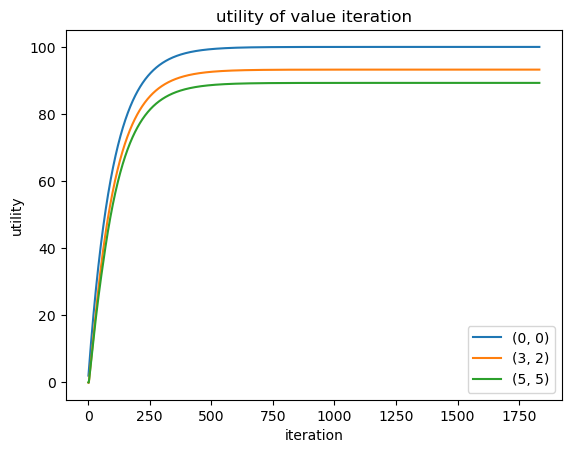

In [13]:
x = range(1, len(utility_value_00) + 1)

plt.plot(x, utility_value_00, label = "(0, 0)")
plt.plot(x, utility_value_32, label = "(3, 2)")
plt.plot(x, utility_value_55, label = "(5, 5)")
plt.title("utility of value iteration")
plt.xlabel("iteration")
plt.ylabel("utility")
plt.legend()
plt.show()

# Part 2 Policy Iteration

In [14]:
def policy_making(policy, states):
    # find a utility from the given policy
    max_diff = 0
    while True:
        next_state = copy.deepcopy(states)
        max_diff = 0
        for row in range(BOARD_ROWS):
            for col in range(BOARD_COLS):
                next_state[row][col] = utility_score(states, row, col, policy[row][col])
                max_diff = max(max_diff, abs(next_state[row][col] - states[row][col]))

        states = next_state
        if max_diff < EPSILON * (1 - GAMMA)/GAMMA:   
            break
    return states

In [15]:
utility_policy_00 = []
utility_policy_32 = []
utility_policy_55 = []
def policy_iteration(policy, state):
    # find better policy until optimal
    iteration = 1
    while True:
        state = policy_making(policy, state)
        modified = 0

        for row in range(BOARD_ROWS):
            for col in range(BOARD_COLS):
                best_action = None
                best_utility = -float("inf")
                for action in range(NUM_OF_ACTIONS):
                    ut = utility_score(state, row, col, action)
                    if ut > best_utility:
                        best_action = action     
                        best_utility = ut      
                    
                if best_utility > utility_score(state , row, col, policy[row][col]):
                    policy[row][col] = best_action
                    modified = 1

        print("Iteration ", iteration)
        utility_policy_00.append(state[0][0])
        utility_policy_32.append(state[3][2])
        utility_policy_55.append(state[5][5])
        print_policy(policy)

        if modified == 0:
            break
        iteration += 1

    return policy, state

In [16]:
all_states = np.zeros((BOARD_ROWS, BOARD_COLS))
for state in GOOD_STATES:
    all_states[state] = 1
for state in BAD_STATES:
    all_states[state] = -1
    
# randomly initialize all the policies
policy = [[random.randint(0,3) for j in range(BOARD_COLS)] for j in range(BOARD_ROWS)]

In [17]:
print("Map")
print("")
print_states(all_states)

Map

|1.0| Wall|1.0|0.0|0.0|1.0|
|0.0|-1.0|0.0|1.0| Wall|-1.0|
|0.0|0.0|-1.0|0.0|1.0|0.0|
|0.0|0.0|0.0|-1.0|1.0|0.0|
|0.0| Wall| Wall| Wall|-1.0|0.0|
|0.0|0.0|0.0|0.0|0.0|0.0|


In [18]:
policy, all_states = policy_iteration(policy, all_states)
optimal_policy = get_policy(all_states)

Iteration  1
|  Up  | Wall | Right| Down | Left | Left |
|  Up  | Down | Right| Right| Wall | Down |
| Right| Down | Right|  Up  | Left | Left |
| Right| Right| Right|  Up  |  Up  | Left |
|  Up  | Wall | Wall | Wall |  Up  |  Up  |
| Right| Right| Right| Right|  Up  |  Up  |
Iteration  2
|  Up  | Wall |  Up  | Down | Left |  Up  |
|  Up  | Left | Right| Right| Wall |  Up  |
|  Up  | Right| Right|  Up  |  Up  | Left |
|  Up  | Right| Right| Right|  Up  | Left |
|  Up  | Wall | Wall | Wall |  Up  |  Up  |
|  Up  | Right| Right| Right|  Up  |  Up  |
Iteration  3
|  Up  | Wall |  Up  | Left | Right|  Up  |
|  Up  | Left | Left | Right| Wall |  Up  |
|  Up  | Left |  Up  |  Up  |  Up  | Left |
|  Up  | Left | Right| Right|  Up  | Left |
|  Up  | Wall | Wall | Wall |  Up  |  Up  |
|  Up  | Left | Right| Right|  Up  |  Up  |
Iteration  4
|  Up  | Wall | Down | Left | Right|  Up  |
|  Up  | Left | Left | Left | Wall |  Up  |
|  Up  | Left | Left | Left | Left | Left |
|  Up  | Left | Left |  

In [19]:
print("Utility")
print("")
print_states(all_states)

Utility

|99.99| Wall|95.04|93.87|92.65|93.32|
|98.39|95.88|94.54|94.39| Wall|90.91|
|96.94|95.58|93.29|93.19|93.24|91.87|
|95.55|94.45|93.23|91.23|92.94|91.62|
|94.31| Wall| Wall| Wall|90.53|90.44|
|92.93|91.72|90.53|89.35|89.34|89.27|


In [20]:
print("Optimal Policy")
print("")
print_policy(optimal_policy)

Optimal Policy

|  Up  | Wall |  Up  | Left | Left |  Up  |
|  Up  |  Up  | Left |  Up  | Wall |  Up  |
|  Up  | Left |  Up  |  Up  |  Up  | Left |
|  Up  | Left | Left |  Up  |  Up  | Left |
|  Up  | Wall | Wall | Wall |  Up  |  Up  |
|  Up  | Left | Left | Left |  Up  |  Up  |


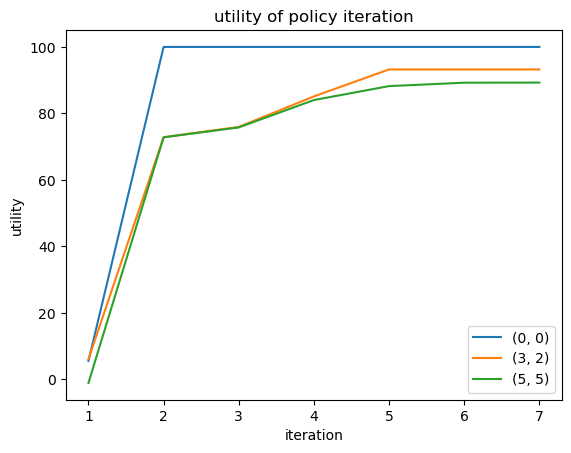

In [21]:
x = range(1, len(utility_policy_00) + 1)

plt.plot(x, utility_policy_00, label = "(0, 0)")
plt.plot(x, utility_policy_32, label = "(3, 2)")
plt.plot(x, utility_policy_55, label = "(5, 5)")
plt.title("utility of policy iteration")
plt.xlabel("iteration")
plt.ylabel("utility")
plt.legend()
plt.show()